# Practice

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import scipy.stats as stats
import sympy as sym
import sympy.plotting.plot as symplot
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# Dot Product
tensor1 = torch.tensor([1,0,1,2])
tensor2 = torch.tensor([0,1,-3,3])
print(torch.dot(tensor1, tensor2))

tensor(3)


In [3]:
# Matrix Multiplication
t3 = torch.randn(3,4)
t4 = torch.randn(4,3)
n1 = np.random.randn(4,4)

# convert numpy matrix to tensor
t5 = torch.tensor(n1, dtype=torch.float)

print(t3@t4)
print(t3@t5)

# transpose a tensor
t6 = torch.randn(4,3)
print(torch.round(t4@t6.T))

tensor([[-2.1365,  0.6704,  0.1579],
        [ 1.5022, -1.0377,  0.5322],
        [-3.2956,  0.4406,  0.1789]])
tensor([[-0.3000,  0.4836, -0.3679, -0.7155],
        [-0.7986,  0.3409, -0.2856,  0.0387],
        [-0.2225, -0.7697,  0.8439, -1.6895]])
tensor([[-4.,  4.,  1., -1.],
        [ 2., -2., -1.,  0.],
        [-2.,  2.,  2., -0.],
        [-2.,  1., -1., -2.]])


## Softmax

[0.09003057 0.24472847 0.66524096]
1.0
[-5 -3 -3 -2 -1 -1  0  0  1  1  2  2  4  5  7  7  7  8 10 10 10 12 12 13
 13]


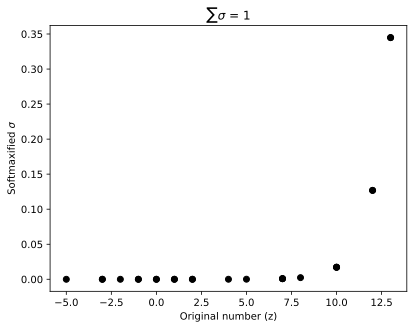

In [4]:
# Softmax

z = [1, 2, 3]
num = np.exp(z)
den = np.sum(num)
sigma = num/den
print(sigma)
print(np.sum(sigma))

z = np.random.randint(-5, high=15, size=25)
z = np.sort(z)
print(z)
num = np.exp(z)
den = np.sum(num)
sigma = num/den
plt.plot(z, sigma, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
# plt.yscale('log') in log space it is linear
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

[-5 -3 -3 -2 -1 -1  0  0  1  1  2  2  4  5  7  7  7  8 10 10 10 12 12 13
 13]
tensor([5.2521e-09, 3.8808e-08, 3.8808e-08, 1.0549e-07, 2.8675e-07, 2.8675e-07,
        7.7948e-07, 7.7948e-07, 2.1188e-06, 2.1188e-06, 5.7596e-06, 5.7596e-06,
        4.2558e-05, 1.1568e-04, 8.5480e-04, 8.5480e-04, 8.5480e-04, 2.3236e-03,
        1.7169e-02, 1.7169e-02, 1.7169e-02, 1.2686e-01, 1.2686e-01, 3.4485e-01,
        3.4485e-01])


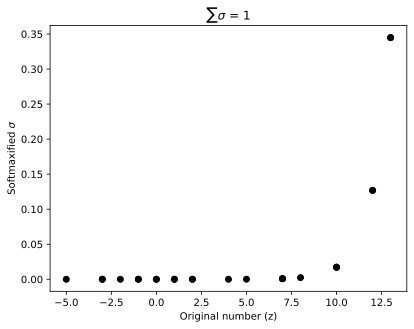

In [5]:
# Using Pytorch
print(z)
# create an instance of softmax activation class
softfun = nn.Softmax(dim=0)
sigmaT = softfun(torch.Tensor(z))
print(sigmaT)
plt.plot(z, sigmaT, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
# plt.yscale('log') in log space it is linear
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

## Logarithms

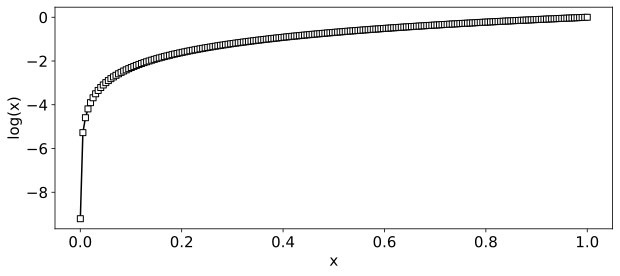

In [6]:
# Log
# log is a monotonically increasing function.
# log stretches small values of x, thus helps in better distinguishing small and closely spaced numbers.
x = np.linspace(0.0001, 1, 200)

# compute logs
logx = np.log(x)

fig = plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size':15})
plt.plot(x, logx, 'ks-', markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

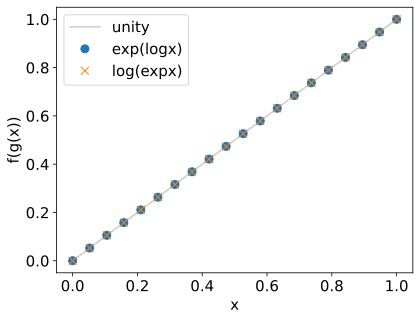

In [7]:
# Log
# log is inverse of natural exponent

x = np.linspace(0.0001, 1, 20)

logx = np.log(x)
expx = np.exp(x)

plt.plot(x, x, color=[.8, .8, .8])
plt.plot(x, np.exp(logx), 'o', markersize=8)
plt.plot(x, np.log(expx), 'x', markersize=8)
plt.xlabel('x')
plt.ylabel('f(g(x))')
plt.legend(['unity', 'exp(logx)', 'log(expx)'])
plt.show()

## Entropy

In [8]:
prob_x = [0.25, 0.75]

H = 0
for p in prob_x:
    H -= p * np.log(p)

print('Entropy = ' + str(H))

Entropy = 0.5623351446188083


## Cross Entropy

In [9]:
observed = [1, 0]
predicted = [0.25, 0.75]

H = 0
for p in range(len(observed)):
    H -= observed[p] * np.log(predicted[p])

print('Cross Entropy = ' + str(H))

Cross Entropy = 1.3862943611198906


In [10]:
# also correct
H = -(observed[0]*np.log(predicted[0]) + observed[1]*np.log(predicted[1]))
print('Cross Entropy = ' + str(H))

# simplification, observed[0] is one and objserved[1] is zero
H = -np.log(predicted[0])
print('Simplified Cross Entropy = ' + str(H))

Cross Entropy = 1.3862943611198906
Simplified Cross Entropy = 1.3862943611198906


In [11]:
# using pytorch

observed_tensor = torch.Tensor(observed)
predicted_tensor = torch.Tensor(predicted)

H = F.binary_cross_entropy(predicted_tensor, observed_tensor)

print(H)

tensor(1.3863)


## T Test

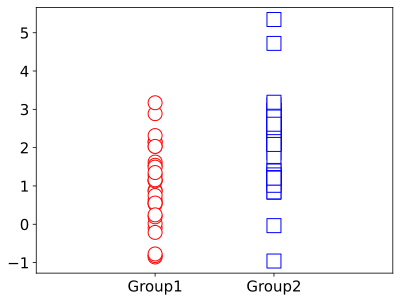

In [12]:
n1 = 30 # samples in dataset 1
n2 = 40 # samples in dataset 2
mean1 = 1 # population mean in dataset 1
mean2 = 2 # population mean in dataset 2

# get seed to always generate same numbers
randseed1 = np.random.RandomState(17)

# generate the data
data1 = mean1 + randseed1.randn(n1)
data2 = mean2 + randseed1.randn(n2)

# print(data1)
# print(data2)

plt.plot(np.zeros(n1), data1, 'ro', markerfacecolor = 'w', markersize = 14)
plt.plot(np.ones(n2), data2, 'bs', markerfacecolor = 'w', markersize = 14)
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Group1', 'Group2'])
plt.show()

In [13]:
t_value, p_value = stats.ttest_ind(data2, data1)
print(t_value, p_value)
# p_value is below 0.05, this means that group 2 is significantly different from group 1. It fails the null hypothesis which
# says that in this case, both the groups are statistically same.
# if we try reducing the difference between mean1 and mean2 then p_value will be more than 0.05, means the null hypothesis
# will pass and alternate hypothesis will fail.

4.052202793074184 0.00013272781515693348


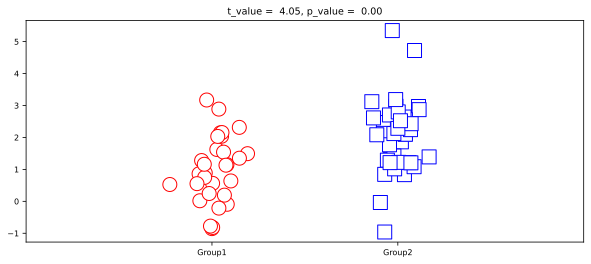

In [14]:
# common way to show t test results in a plot

fig = plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size': 8})

# putting some small random numbers on x-axis to get rid of overlapping points
plt.plot(0+randseed1.randn(n1)/15, data1, 'ro', markerfacecolor = 'w', markersize = 14)
plt.plot(1+randseed1.randn(n2)/15, data2, 'bs', markerfacecolor = 'w', markersize = 14)
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Group1', 'Group2'])
plt.title(f't_value = {t_value: .2f}, p_value = {p_value: .2f}')
plt.show()


## Derivatives

In [15]:
# create a symbolic variable
x = sym.symbols('x')

fx = 2*x**2

# compute its derivative
df = sym.diff(fx, x)

print(fx)
print(df)

2*x**2
4*x


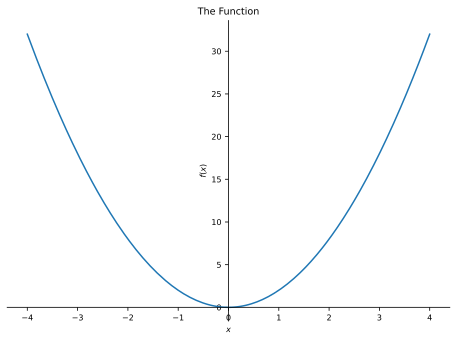

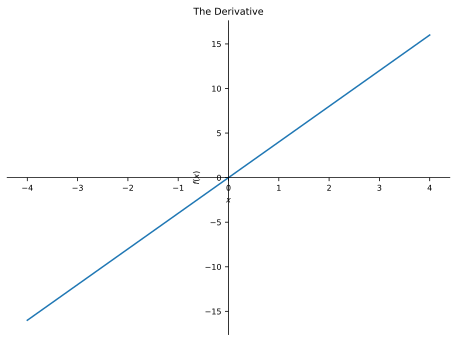

In [16]:
symplot(fx, (x, -4, 4), title = 'The Function')
symplot(df, (x, -4, 4), title = 'The Derivative')

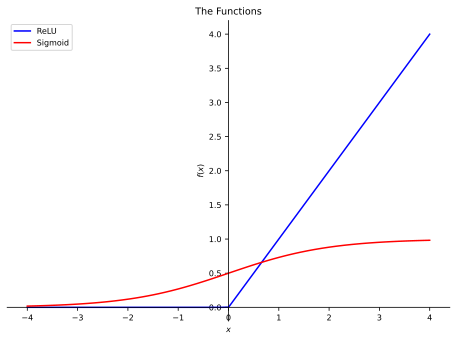

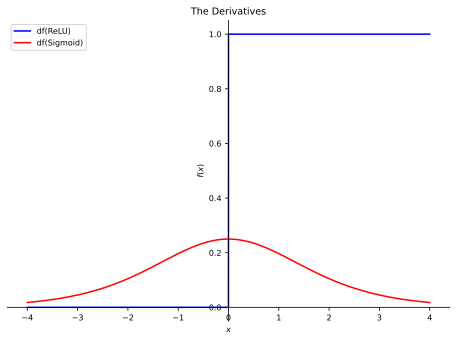

In [17]:
# repeat with ReLU and sigmoid functions

relu = sym.Max(0, x)
sigmoid = 1 / (1 + sym.exp(-x))

# Plot the functions
p = symplot(relu, (x, -4, 4), label = 'ReLU', show = False, line_color = 'blue')
p.extend(symplot(sigmoid, (x, -4, 4), label = 'Sigmoid', show = False, line_color = 'red'))
p.legend = True
p.title = 'The Functions'
p.show()

# Plot the derivatives
p = symplot(sym.diff(relu), (x, -4, 4), label = 'df(ReLU)', show = False, line_color = 'blue')
p.extend(symplot(sym.diff(sigmoid), (x, -4, 4), label = 'df(Sigmoid)', show = False, line_color = 'red'))
p.legend = True
p.title = 'The Derivatives'
p.show()

## Gradient Descent

### Gradient Descent in 1D

In the examples below, we are trying to find the local minima by minimizing the derivative i.e. the gradient.

In [18]:
x = sym.symbols('x')
# fx = 3*x**2 - 3*x + 4
fx = 3*x**2 - 3*x + 4

df = sym.diff(fx)
df
# fx.subs(x, 2)
# df.subs(x, 2)

6*x - 3

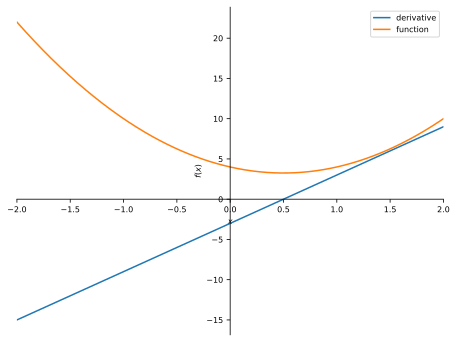

In [19]:
p = symplot(df, (x, -2, 2), label = 'derivative', show = False, adaptive = False)
p.extend(symplot(fx, (x, -2, 2), label = 'function', show = False, adaptive = False))
p.xlim = [-2, 2]
p.legend = True
p.show()

In [20]:
# random starting point
parameter = np.random.uniform(-2, 2)
# parameter = 0.49
print(parameter)

# learning params
learning_rate = 0.01
epochs = 1000

# storing some results
modelparams = np.zeros((epochs, 2))

for i in range(epochs):
    gradient = df.subs(x, parameter)
    parameter = parameter - learning_rate*gradient
    # at row i storing the parameter/localmin and gradient
    modelparams[i, :] = parameter, gradient
    # stopping based on gradient value rather than on the number of epochs
    # if(gradient < 0.1 and gradient > -0.1):
    #     break

parameter

0.3817846517529895


0.500000000000000

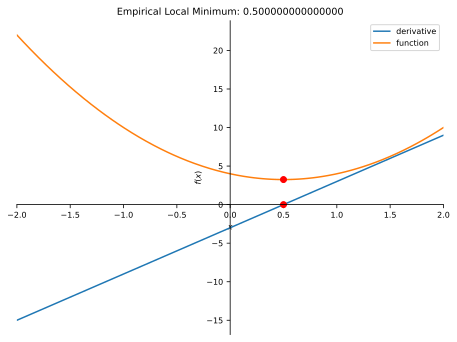

In [21]:
p = symplot(df, (x, -2, 2), label = 'derivative', show = False, markers = [{'args' : [parameter , fx.subs(x, parameter), 'ro']},
                                                                           {'args' : [parameter , df.subs(x, parameter), 'ro']}])
p.extend(symplot(fx, (x, -2, 2), label = 'function', show = False))
p.xlim = [-2, 2]
p.title = 'Empirical Local Minimum: ' + str(parameter)
p.legend = True
p.show()

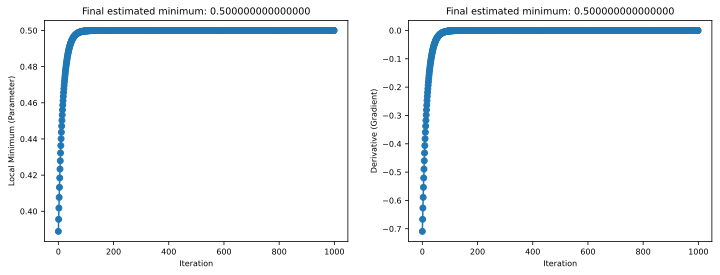

In [22]:
fix, ax = plt.subplots(1, 2, figsize = (12, 4))

for i in range(2):
    ax[i].plot(modelparams[:, i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {parameter}')
    # ax[i].set_xlim(0, 100)

ax[0].set_ylabel('Local Minimum (Parameter)')
ax[1].set_ylabel('Derivative (Gradient)')

plt.show()


### Code Challenge - 1

In [23]:
x = sym.symbols('x')

fx = sym.cos(2*sym.pi*x) + x**2
df = sym.diff(fx)
df
# df.evalf(subs={x: -3.21867199067649})
# sym.solve(df.subs(x, 1.28435917415968))
# df

2*x - 2*pi*sin(2*pi*x)

In [24]:
parameter = np.random.uniform(-2, 2)
# parameter = 0
parameter
learning_rate = 0.01
epochs = 100

for i in range(epochs):
    gradient = df.evalf(subs={x: parameter})
    parameter = parameter - learning_rate*gradient

    # here I'm trying to bring it out of local maxima
    gradient_left = df.evalf(subs={x: parameter - 0.00001}) # changing parameter by a small value to get left df
    gradient_right = df.evalf(subs={x: parameter + 0.00001}) # changing parameter by a small value to get right df
    # at local maxima df>0 on left side and df<0 on right side
    if(gradient_left > 0 and gradient_right < 0):
        # means it is on local maxima, so making a small change in the parameter, THIS MIGHT BE WRONG!!!
        # should we go on the right side or the left side? we don't know.
        parameter-=0.00001
    # print(parameter)
parameter
i

99

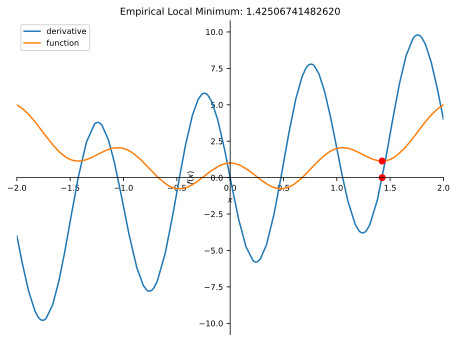

In [25]:
p = symplot(df, (x, -2, 2), label = 'derivative', show = False, markers = [{'args' : [parameter , fx.subs(x, parameter), 'ro']},
                                                                           {'args' : [parameter , df.subs(x, parameter), 'ro']}])
p.extend(symplot(fx, (x, -2, 2), label = 'function', show = False))
p.xlim = [-2, 2]
p.title = 'Empirical Local Minimum: ' + str(parameter)
p.legend = True
p.show()

NOTE: In the above example, the gradient is getting stuck at the local minima, rather in this case it should find the global minima. Theoratically this is a problem but practically we have multiple dimensions due to which we don't have this many local minimas, we've saddle points in those cases.

### Gradient Descent in 2D

In [26]:
def peaks(x, y):
    x, y = np.meshgrid(x, y)
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
    return z

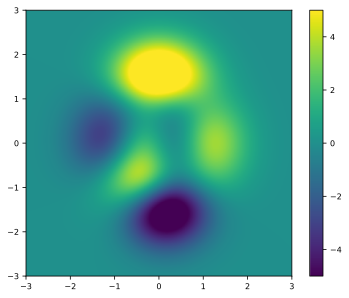

In [27]:
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.colorbar()
plt.show()

In [28]:
# create derivative functions of peaks function
sx, sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# crate derivative functions so that we can pass numerical values and evaluate
df_x = sym.lambdify((sx,sy), sym.diff(sZ,sx), 'sympy')
df_y = sym.lambdify((sx,sy), sym.diff(sZ,sy), 'sympy')

# e.g. evaluation
# df_x(0.228, -1.625).evalf()
# df_y(0.228, -1.625).evalf()



In [29]:
parameter = np.random.rand(2)*4-2
# parameter = [0, 1.4]
parameter = [-0.6166386, -1.02166748]
# parameter = [0.228, -1.625]



startpoint = parameter[:]

learning_rate = 0.01
epochs = 1000

# will be storing the parameter (x, y) at each epoch
trajectory = np.zeros((epochs, 2))

for i in range(epochs):
    grad = np.array([df_x(parameter[0], parameter[1]).evalf(),
                     df_y(parameter[0], parameter[1]).evalf()
                     ])
    trajectory[i, :] = parameter
    parameter = parameter - learning_rate*grad
print(startpoint)
print(parameter)


[-0.6166386, -1.02166748]
[0.228278920556369 -1.62553495750000]


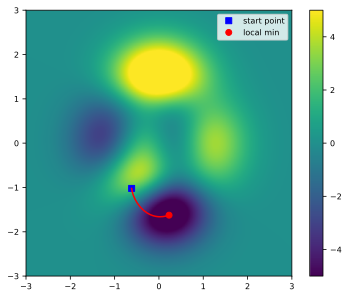

In [30]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpoint[0], startpoint[1], 'bs')
plt.plot(parameter[0], parameter[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['start point', 'local min'])
plt.colorbar()
plt.show()

### Running Experiments on Gradient Descent

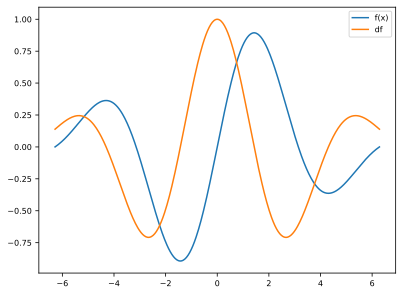

In [31]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*0.05)

df = np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)

plt.plot(x, fx, x, df)
plt.legend(['f(x)', 'df'])

In [32]:
def fx(x):
    return np.sin(x) * np.exp(-x**2*0.05)
def deriv(x):
    return np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)

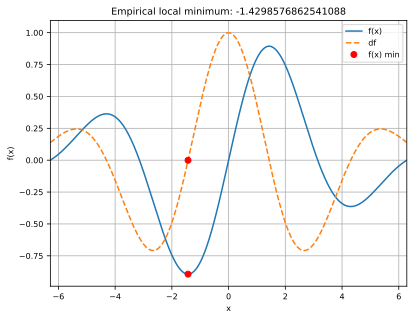

In [44]:
# random starting point
localmin = np.random.choice(x, 1)

learning_rate = 0.01
epochs = 1000

for i in range(epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

### Run Parametric Experiments

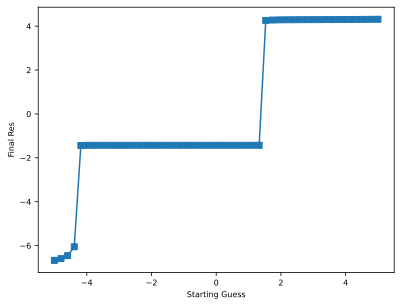

In [48]:
# Experiment 1: Systematically varying the starting locations

startlocs = np.linspace(-5, 5, 50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx, localmin in enumerate(startlocs):
    # run through the training epochs
    for i in range(epochs):
        grad = deriv(localmin)
        localmin = localmin - grad*learning_rate
    # store the finalres
    finalres[idx] = localmin

# plot the results
plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting Guess')
plt.ylabel('Final Res')
plt.show()

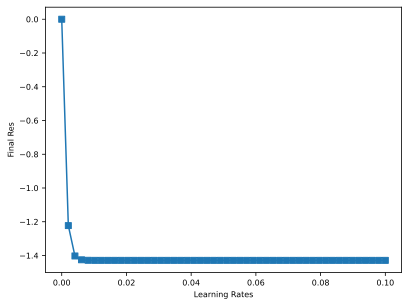

In [50]:
# Experiment 2: Systematically Varying the learning rate

learning_rates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learning_rates))

# loop over learning rates
for idx, l_rate in enumerate(learning_rates):
    # taking a fixed localmin rather than taking a random localmin, as we're running an experiment
    # and want to fix as many parameters as possible and vary a small number of variables.
    # This'll allow us to learn the effect of learning rates while holding other parameters as constant. 
    localmin = 0
 
    for i in range(epochs):
        grad = deriv(localmin)
        localmin = localmin - grad*l_rate
    finalres[idx] = localmin

plt.plot(learning_rates, finalres, 's-')
plt.xlabel('Learning Rates')
plt.ylabel('Final Res')
plt.show()

In [ ]:
# We can see that as we're increasing the learning rate, we're getting towards the optimal result.

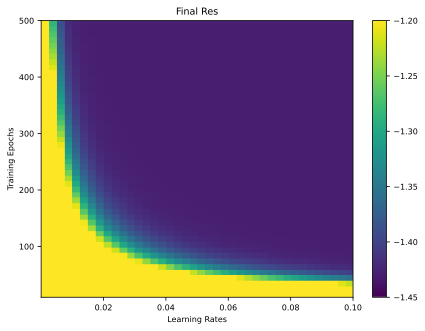

In [63]:
# Experiment 3: Interations between learning rate and training epochs

learning_rates = np.linspace(1e-10, 1e-1, 50)
epochs = np.round(np.linspace(10, 500, 40))

finalres = np.zeros((len(learning_rates), len(epochs)))

for Lidx, l_rate in enumerate(learning_rates):
    for Eidx, tEpochs in enumerate(epochs):
        localmin = 0

        for i in range(int(tEpochs)):
            grad = deriv(localmin)
            localmin = localmin - l_rate*grad
        finalres[Lidx, Eidx] = localmin
    
fig, ax = plt.subplots(figsize=(7,5))
plt.imshow(finalres, extent=[learning_rates[0], learning_rates[-1], epochs[0], epochs[-1]], aspect='auto', origin='lower',
           vmin=-1.45, vmax=-1.2)
plt.xlabel('Learning Rates')
plt.ylabel('Training Epochs')
plt.title('Final Res')
plt.colorbar()
plt.show()

# yellow is bad, blue is good.

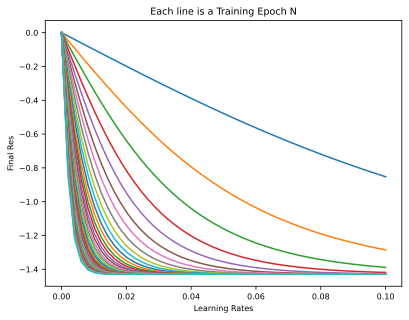

In [64]:
# another visualization

plt.plot(learning_rates, finalres)
plt.xlabel('Learning Rates')
plt.ylabel('Final Res')
plt.title('Each line is a Training Epoch N')
plt.show()

### Code Challenge - 2

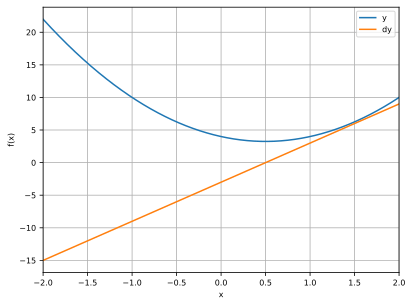

In [66]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

G.D. Using Fixed Learning Rate

In [118]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 50

modelparamsFixedLearningRate = np.zeros((training_epochs, 3))
# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate
  localmin = localmin - lr*grad
  modelparamsFixedLearningRate[i,:] = localmin[0],grad[0],lr

G.D. Using Gradient-Based Learning Rate

In [119]:
# learning parameters
learning_rate = .01
training_epochs = 50

modelparamsGradBasedLearningRate = np.zeros((training_epochs, 3))
# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  # adapt learning rate according to the grad. As grad approaches zero, learning rate will be smaller
  lr = learning_rate*np.abs(grad)
  localmin = localmin - lr*grad
  modelparamsGradBasedLearningRate[i,:] = localmin[0],grad[0],lr[0]

G.D. Using Time-Based Learning Rate

In [122]:
# learning parameters
learning_rate = .1
training_epochs = 50

modelparamsTimeBasedLearningRate = np.zeros((training_epochs, 3))
# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  # adapt learning rate according to the epochs. As i increases, learning rate will be smaller
  lr = learning_rate*(1-   (i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTimeBasedLearningRate[i,:] = localmin[0],grad[0],lr

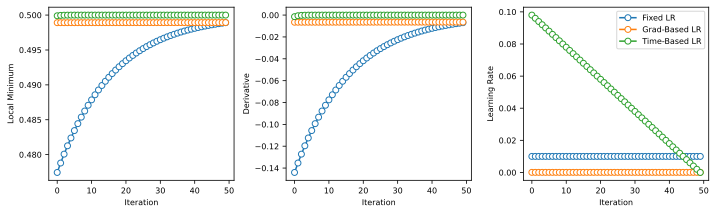

In [124]:
fig, ax = plt.subplots(1,3,figsize=(10,3))

for i in range(3):
    ax[i].plot(modelparamsFixedLearningRate[:,i], 'o-', markerfacecolor='w')
    ax[i].plot(modelparamsGradBasedLearningRate[:,i], 'o-', markerfacecolor='w')
    ax[i].plot(modelparamsTimeBasedLearningRate[:,i], 'o-', markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed LR', 'Grad-Based LR', 'Time-Based LR'])

plt.tight_layout()
plt.show()

